Imports

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [4]:

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test",
                                          target_size=(32,32),
                                          batch_size = 1,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/train",
                                          target_size=(32,32),
                                          batch_size =1,
                                          class_mode = 'binary',)

test_dataset.class_indices

Found 400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


{'SNGAN_bicubic': 0, 'imagewoof': 1}

Design Model

In [5]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-10 21:53:03.567964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 21:53:03.568265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [39]:
history = model.fit(train_dataset,
         steps_per_epoch = 80,
         epochs = 10,
         validation_data = test_dataset
         )

Epoch 1/10
80/80 [==============================] - 5s 66ms/step - loss: 0.1067 - accuracy: 0.9625 - val_loss: 0.8286 - val_accuracy: 0.7981
Epoch 2/10
80/80 [==============================] - 5s 62ms/step - loss: 0.0950 - accuracy: 0.9500 - val_loss: 0.8972 - val_accuracy: 0.7937
Epoch 3/10
80/80 [==============================] - 5s 62ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.9088 - val_accuracy: 0.7763
Epoch 4/10
80/80 [==============================] - 5s 62ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.9319 - val_accuracy: 0.7919
Epoch 5/10
80/80 [==============================] - 5s 62ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.0784 - val_accuracy: 0.7950
Epoch 6/10
80/80 [==============================] - 5s 62ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.0719 - val_accuracy: 0.8012
Epoch 7/10
80/80 [==============================] - 5s 62ms/step - loss: 6.0383e-04 - accuracy: 1.0000 - val_loss: 1.0881 - val_accuracy: 0.8031
Epoch 8/1

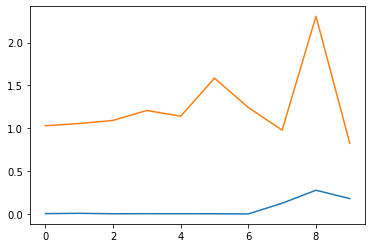

In [35]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(10)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

In [38]:
_, acc = model.evaluate(test_dataset)
print(acc *100)

1600/1600 [==============================] - 6s 4ms/step - loss: 0.7710 - accuracy: 0.7937
79.3749988079071


Prediction

[[1.]]


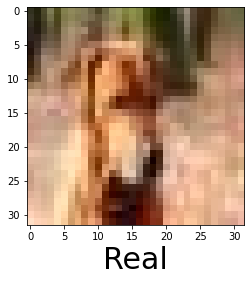

In [10]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/imagewoof_test/985.jpg")


[[0.]]


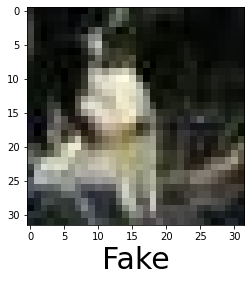

In [27]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/test/SNGAN_bicubic_test/947.jpg")